# Train OCR text Detector quick example

In [2]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')


sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.TextDetectors.base import OCR

In [3]:
plt.rcParams["figure.figsize"] = (10, 10)

In [4]:
%matplotlib inline 

In [5]:
# auto download latest dataset
from NomeroffNet.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("EuUaFrom2004")
PATH_TO_DATASET = info["dataset_path"]

autoriaNumberplateOcrUa-2021-08-25.zip: 0.00B [00:00, ?B/s]

Downloaded model path: /mnt/data/var/www/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2021-08-25.zip


autoriaNumberplateOcrUa-2021-08-25.zip: 3.37GB [11:17, 4.98MB/s]                               


In [6]:
DATASET_NAME = "eu_2004_2015"
VERSION = "2021_07_27_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/mnt/data/var/www/nomeroff-net/models/anpr_ocr_eu_2004_2015_2021_07_27_pytorch_lightning.ckpt'

In [11]:
class eu_ua_2004_2015(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", 
                        "9", "A", "B", "C", "E", "H", "I", "K", "M", 
                        "O", "P", "T", "X"]
        
        self.epochs = 50
        self.batch_size = 32
        self.gpus = 0

In [12]:
ocrTextDetector = eu_ua_2004_2015()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=6)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'1', '4', 'X', '5', '7', '0', '3', '9', 'P', '2', 'B', 'C', 'Z', 'E', '6', 'M', 'I', 'O', 'H', 'T', '8', 'A', 'K'}
Letters val  {'1', '4', 'X', '5', '3', '0', '7', '9', 'P', '2', 'B', 'C', 'Z', '6', 'E', 'M', 'I', 'O', 'H', 'T', '8', 'A', 'K'}
Letters test  {'1', '4', 'X', '5', '3', '0', '7', '9', 'P', '2', 'B', 'C', 'Z', 'E', '6', 'M', 'I', 'O', 'H', 'T', '8', 'A', 'K'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/dmitroprobachay/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.6 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.226    Total estimated model params size (MB)


LR finder stopped early after 51 steps due to diverging loss.
Traceback (most recent call last):
  File "/usr/lib64/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/usr/lib64/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib64/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/usr/lib64/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Restored states from the checkpoint file at /mnt/data/var/www/nomeroff-net/train/lr_find_temp_model.ckpt


Found lr: 1.9952623149688785e-24


ValueError: x and y must have same first dimension, but have shapes (52,) and (51,)

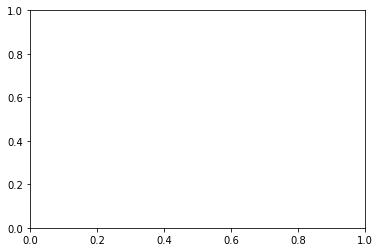

In [13]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


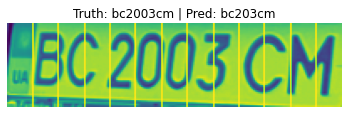

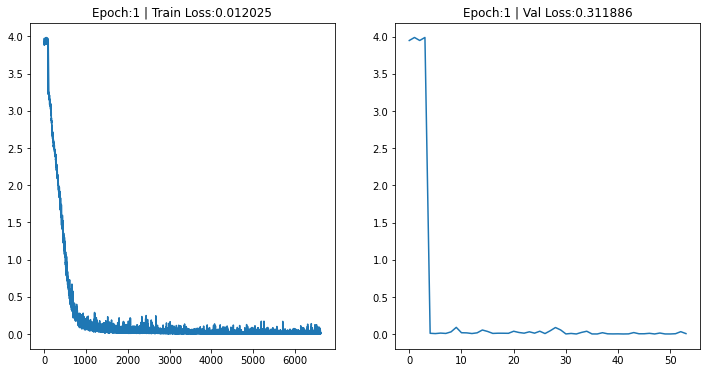

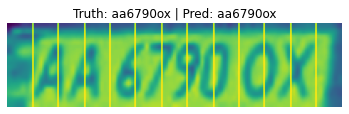

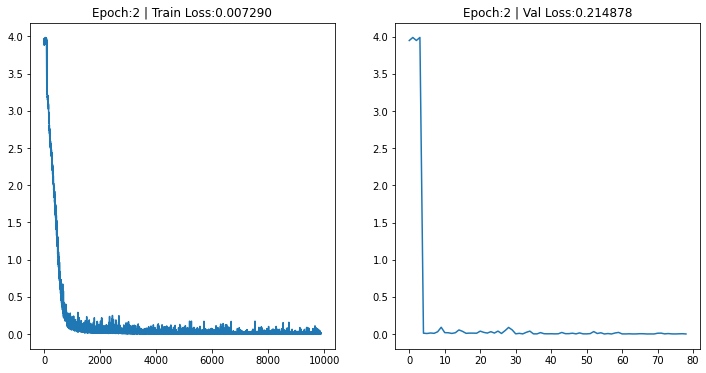

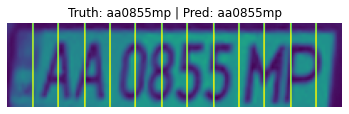

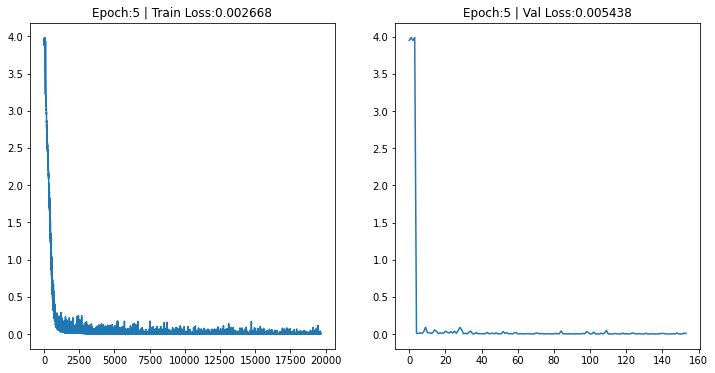

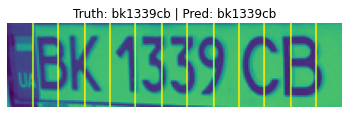

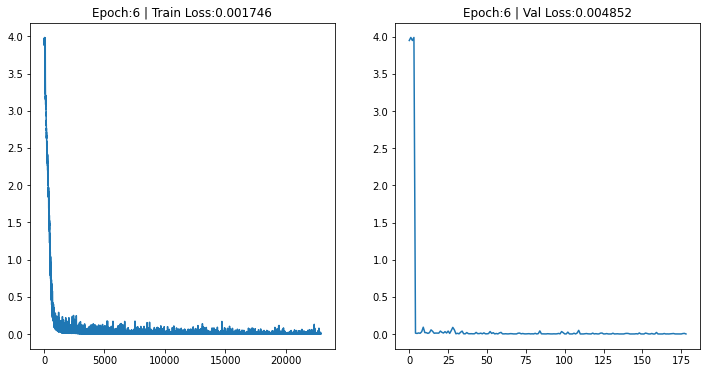

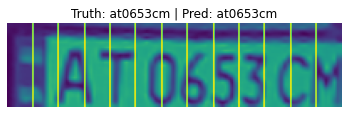

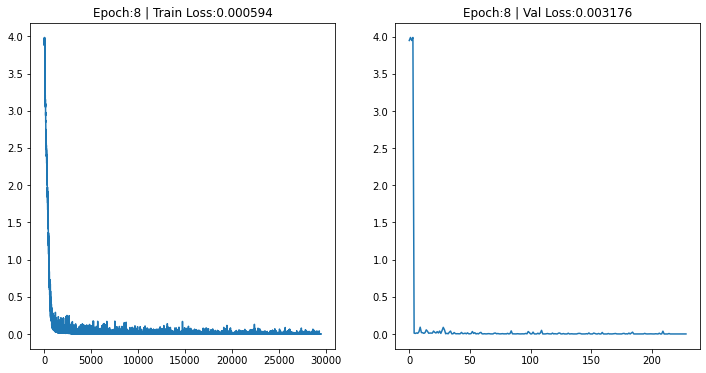

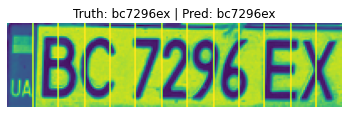

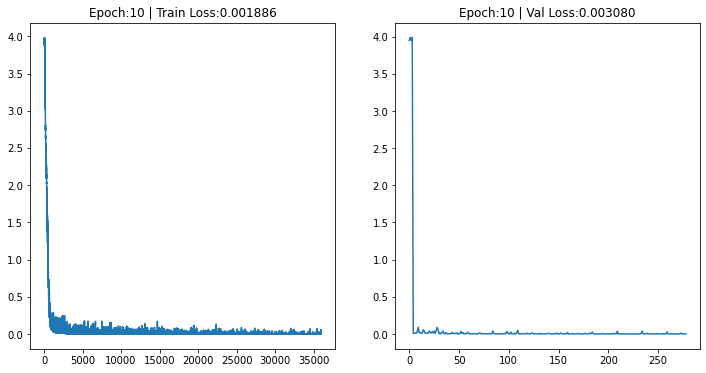

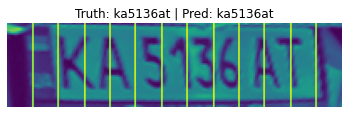

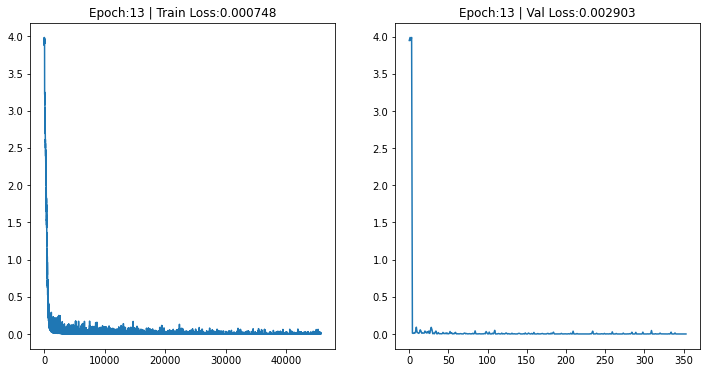

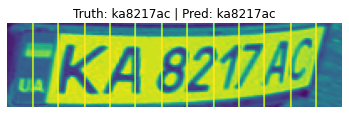

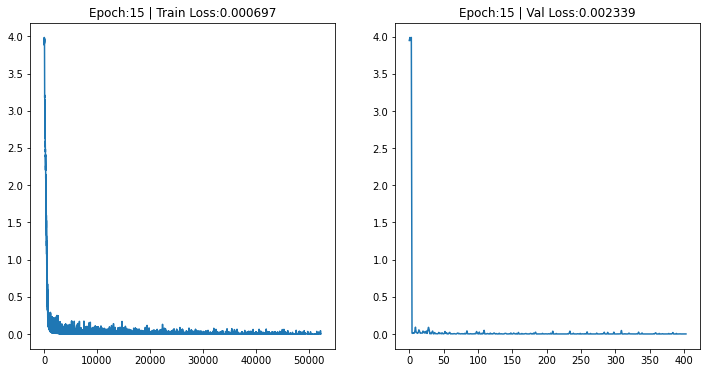

Epoch    22: reducing learning rate of group 0 to 2.0000e-03.


Epoch    28: reducing learning rate of group 0 to 2.0000e-04.


Epoch    34: reducing learning rate of group 0 to 2.0000e-05.


Epoch    40: reducing learning rate of group 0 to 2.0000e-06.


Epoch    46: reducing learning rate of group 0 to 2.0000e-07.


Epoch    52: reducing learning rate of group 0 to 2.0000e-08.


Epoch    58: reducing learning rate of group 0 to 2.0000e-09.


Swapping scheduler <torch.optim.lr_scheduler.ReduceLROnPlateau object at 0x7f3ecc4e1b50> for <torch.optim.swa_utils.SWALR object at 0x7f3ee125eaf0>


[INFO] best model path /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/data/logs/ocr/epoch=15-step=52127.ckpt


RuntimeError: Only Tensors created explicitly by the user (graph leaves) support the deepcopy protocol at the moment

In [10]:
model = ocrTextDetector.train()

In [27]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /mnt/store/nomeroff-net/nomeroff-net/models/anpr_ocr_eu_2004_20015_2021_07_27_pytorch_lightning.ckpt


In [13]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/AT7077BI.png
Predicted: at077bi 			 True: at7077bi

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/AA5557MI.png
Predicted: aa557mm 			 True: aa5557mm

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/AC2846AP.png
Predicted: ac2846ap 			 True: ac2046ap

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/AI4268BM.png
Predicted: ai268bm 			 True: ai4268bm

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/BC9607CX.png
Predicted: b


[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/BO4597BO.png
Predicted: bo597bo 			 True: bo4597bo

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/AC9106BX.png
Predicted: ac916bx 			 True: ac9106bx

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/BK6388BE.png
Predicted: bk388be 			 True: bk6388be
Testing Accuracy:  0.9461444308445532


## than train with augumentation

In [28]:
class eu_ua_2004_2015(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", 
                        "9", "A", "B", "C", "E", "H", "I", "K", "M", 
                        "O", "P", "T", "X"]
        
        self.epochs = 25
        self.batch_size = 256
        self.gpus = 1

In [29]:
ocrTextDetector = eu_ua_2004_2015()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=6)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'8', 'C', 'I', '0', '6', '5', 'T', '1', '4', '3', '2', 'M', 'O', '7', '9', 'P', 'X', 'H', 'K', 'B', 'E', 'A'}
Letters val  {'8', 'C', 'I', '0', '6', '5', 'T', '1', '4', '3', '2', 'M', 'O', '7', 'P', '9', 'X', 'H', 'K', 'B', 'A', 'E'}
Letters test  {'8', 'C', 'I', '0', '6', '5', 'T', '1', '4', '3', '2', 'M', 'O', '7', '9', 'P', 'X', 'H', 'K', 'B', 'A', 'E'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [9]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Restored states from the checkpoint file at /mnt/store/nomeroff-net/nomeroff-net/train/lr_find_temp_model.ckpt


Found lr: 7.943282347242817e-27


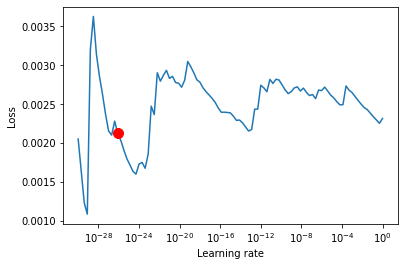

In [31]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


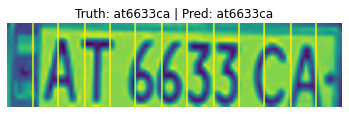

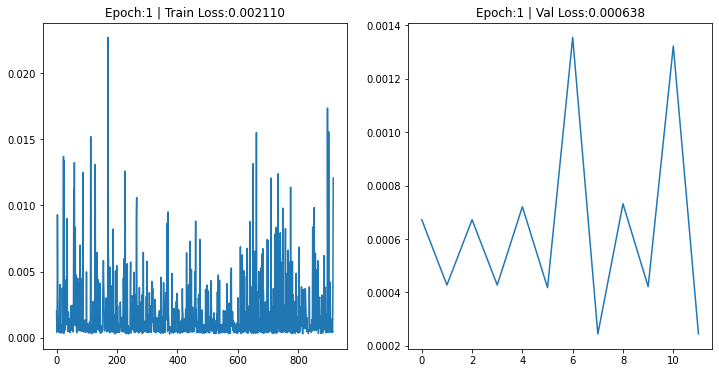

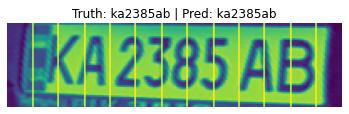

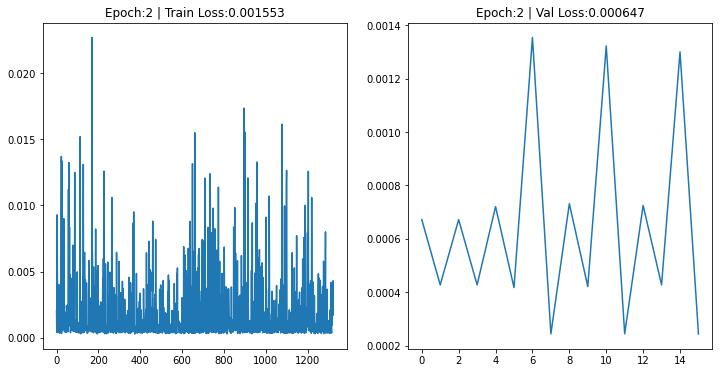

[INFO] best model path /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/data/logs/ocr/epoch=2-step=1223.ckpt


RuntimeError: Only Tensors created explicitly by the user (graph leaves) support the deepcopy protocol at the moment

In [32]:
model = ocrTextDetector.train()

In [10]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/AC2846AP.png
Predicted: ac2846ap 			 True: ac2046ap

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/KA3616AE.png
Predicted: ka3616ace 			 True: ka3616ae

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/BC9607CX.png
Predicted: bc607cx 			 True: bc9607cx

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/BH9131IC.png
Predicted: bh931ic 			 True: bh9131ic

[INFO] /mnt/store/nomeroff-net/nomeroff-net/NomeroffNet/tools/../../data/./dataset/TextDetector/EuUaFrom2004/autoriaNumberplateOcrUa-2020-12-21/test/img/AC7307BO.png
Predicted:

In [ ]:
# 0.014759304890265832 per one photo
